# Урок 6. Градиентный бустинг. AdaBoost

### Реализация алгоритма градиентного бустинга<a class='anchor' id='implement'>

In [46]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [47]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [49]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    return predictions

In [50]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [51]:
def residual(y, z):
    return - (z - y)

In [52]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [53]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta, 
                 n_trees = 0, max_depth = 0, list_mse_train = [], list_mse_test = []):
    train_prediction = gb_predict(X_train, trees, eta)

    mse_train = mean_squared_error(y_train, train_prediction)
    list_mse_train.append(mse_train)

    test_prediction = gb_predict(X_test, trees, eta)

    mse_test = mean_squared_error(y_test, test_prediction)
    list_mse_test.append(mse_test)
    
    print(f'Число деревьев = {n_trees};  Глубина = {max_depth};  eta = {eta};  \
mse_train = {round(mse_train, 4)};  mse_test = {round(mse_test, 4)}')

In [54]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

### Задание 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [55]:
def get_error_plot_mse(list_param, param_name, list_mse_train, list_mse_test):
    plt.figure(figsize = (13, 6))
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    
    plt.xlim(0, max(list_param) * 1.1 )
    
    plt.plot(list_param, list_mse_train, label='train error')
    plt.plot(list_param, list_mse_test, label='test error')

    for n_trees in list_param:
        plt.axvline(x = n_trees, linestyle='--', linewidth = 0.5, c = 'black')
    
    plt.title(param_name, fontsize = 14)
    plt.legend(loc='upper left')
    plt.show()

#### Перебор числа деревьев

In [56]:
%%time
# Число деревьев в ансамбле
n_trees = 1
# Максимальная глубина деревьев
max_depth = 3
# Шаг
eta = 0.1

list_param = []
list_mse_train = []
list_mse_test = []

while n_trees <= 80:
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    
    list_param.append(n_trees)
    mse_train = mse_test = 0
    evaluate_alg(X_train, X_test, y_train, y_test, trees, eta, n_trees, max_depth, list_mse_train, list_mse_test)
   
    n_trees *= 2

Число деревьев = 1;  Глубина = 3;  eta = 0.1;  mse_train = 24916.833;  mse_test = 21234.6798
Число деревьев = 2;  Глубина = 3;  eta = 0.1;  mse_train = 20688.9772;  mse_test = 17582.2083
Число деревьев = 4;  Глубина = 3;  eta = 0.1;  mse_train = 14432.9155;  mse_test = 12386.6679
Число деревьев = 8;  Глубина = 3;  eta = 0.1;  mse_train = 7555.3884;  mse_test = 6868.1808
Число деревьев = 16;  Глубина = 3;  eta = 0.1;  mse_train = 3047.2954;  mse_test = 3765.0981
Число деревьев = 32;  Глубина = 3;  eta = 0.1;  mse_train = 1617.2121;  mse_test = 3469.7191
Число деревьев = 64;  Глубина = 3;  eta = 0.1;  mse_train = 1121.8797;  mse_test = 3586.8277
Wall time: 3min 58s


#### График зависимости ошибки от числа деревьев

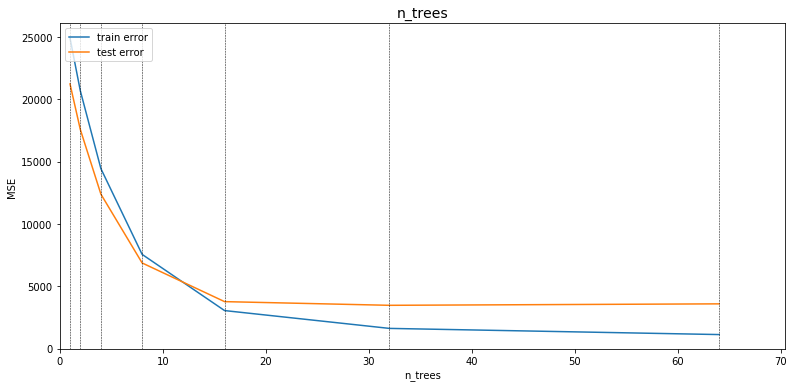

In [57]:
get_error_plot_mse(list_param, 'n_trees', list_mse_train, list_mse_test)

#### Вывод
С увеличением числа деревьев ошибка на тренировочной выборке продолжает уменьшаться.
На тестовой выборке ошибка снижается до значений 16-32 дерева и фактически переходит в асимптоту.


#### Перебор глубины дерева

In [58]:
%%time
# Число деревьев в ансамбле
n_trees = 10
# Максимальная глубина деревьев
max_depth = 1
# Шаг
eta = 0.1

list_param = []
list_mse_train = []
list_mse_test = []

while max_depth <= 10:
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    
    list_param.append(max_depth)
    mse_train = mse_test = 0
    evaluate_alg(X_train, X_test, y_train, y_test, trees, eta, n_trees, max_depth, list_mse_train, list_mse_test)
   
    max_depth += 1

Число деревьев = 10;  Глубина = 1;  eta = 0.1;  mse_train = 6898.9041;  mse_test = 5674.4679
Число деревьев = 10;  Глубина = 2;  eta = 0.1;  mse_train = 6249.5606;  mse_test = 5417.3102
Число деревьев = 10;  Глубина = 3;  eta = 0.1;  mse_train = 5717.4081;  mse_test = 5533.974
Число деревьев = 10;  Глубина = 4;  eta = 0.1;  mse_train = 5241.9685;  mse_test = 5448.6866
Число деревьев = 10;  Глубина = 5;  eta = 0.1;  mse_train = 4766.8953;  mse_test = 5708.535
Число деревьев = 10;  Глубина = 6;  eta = 0.1;  mse_train = 4388.1029;  mse_test = 5906.0179
Число деревьев = 10;  Глубина = 7;  eta = 0.1;  mse_train = 4094.8159;  mse_test = 6085.4879
Число деревьев = 10;  Глубина = 8;  eta = 0.1;  mse_train = 3870.0579;  mse_test = 6753.81
Число деревьев = 10;  Глубина = 9;  eta = 0.1;  mse_train = 3739.3706;  mse_test = 6935.0867
Число деревьев = 10;  Глубина = 10;  eta = 0.1;  mse_train = 3692.9522;  mse_test = 7032.844
Wall time: 37.4 s


#### График зависимости ошибки от максимальной глубины дерева

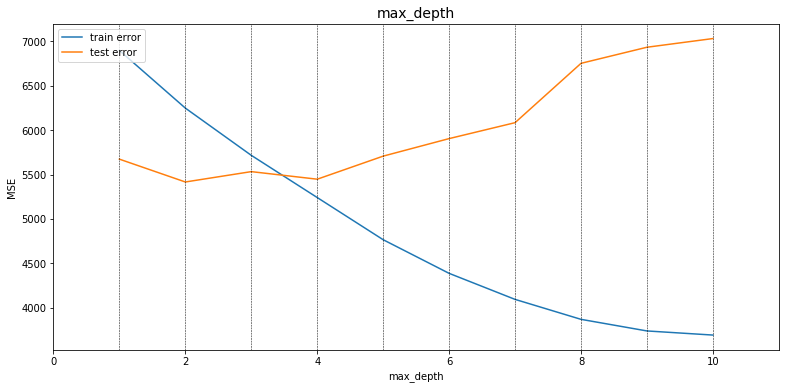

In [59]:
get_error_plot_mse(list_param, 'max_depth', list_mse_train, list_mse_test)

#### Вывод
С увеличением максимальной глубины дерева ошибка на тренировочной выборке продолжает уменьшаться.
На тестовой выборке ошибка снижается до значения глубины = 4 (лучшая ошибка), затем снова начинает увеличиваться, т.е. начиная со значения 5 происходит переобучение.
